In [71]:
# !pip install -q hvplot
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
# !pip install -q yfinance

In [72]:
# Import packages
import yfinance as yf
import pandas as pd
import numpy as np
from keras.losses import mean_absolute_error
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [73]:
# Set the start and end date
start_date = '2017-05-26'

# Define the ticker list
tickers_list = ['AAPL', 'SNAP', 'MSFT', 'AMD', 'NVDA', 'AMC', 'JNJ', 'WMT','JPM','KO']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker,
                               start_date)['Adj Close']

# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,SNAP,MSFT,AMD,NVDA,AMC,JNJ,WMT,JPM,KO
Date,,,,,,,,,,
2017-05-25,36.415878,21.930000,65.209846,10.98,34.188549,18.363401,111.812981,71.223228,74.307785,38.626404
2017-05-26,36.354340,21.219999,65.528313,11.00,35.073799,19.383591,111.278152,71.059525,74.316490,38.609390
2017-05-30,36.368546,21.450001,65.949799,11.12,35.823051,18.324167,111.444733,71.077690,73.045372,38.643410
2017-05-31,36.153175,21.209999,65.415894,11.19,35.694469,17.657116,112.444260,71.486977,71.521790,38.677448
2017-06-01,36.252579,21.340000,65.659431,10.93,35.696938,18.567686,112.908920,72.587479,72.314049,38.949638


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1266 entries, 2017-05-25 to 2022-06-03
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1266 non-null   float64
 1   SNAP    1266 non-null   float64
 2   MSFT    1266 non-null   float64
 3   AMD     1266 non-null   float64
 4   NVDA    1266 non-null   float64
 5   AMC     1266 non-null   float64
 6   JNJ     1266 non-null   float64
 7   WMT     1266 non-null   float64
 8   JPM     1266 non-null   float64
 9   KO      1266 non-null   float64
dtypes: float64(10)
memory usage: 108.8 KB


In [75]:
data.describe()

,AAPL,SNAP,MSFT,AMD,NVDA,AMC,JNJ,WMT,JPM,KO
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,84.071276,26.600063,169.634808,53.275355,103.050037,14.438060,137.078294,111.547438,112.449288,47.073586
std,45.980977,19.933911,80.661243,38.994312,74.463081,10.864901,19.684024,25.196343,25.606984,7.118998
min,33.670544,4.990000,63.851700,9.530000,31.561327,1.980000,104.860481,66.602951,71.521790,35.246216
25%,43.802893,13.390000,100.636358,19.007500,46.794730,8.465513,120.966902,89.380705,94.237772,40.827560
50%,63.355236,16.690001,145.598679,39.150002,63.047684,12.134282,130.924416,112.164764,101.874649,46.415375
75%,126.666002,38.955001,234.365673,85.062500,138.158058,15.794000,156.232880,137.204636,129.738419,52.089306
max,181.511703,83.110001,341.606384,161.910004,333.662292,62.549999,184.822342,159.290985,169.500061,66.209999


In [76]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape:", data.shape)
print("Null Value Present: ", data.isnull().values.any())

Dataframe Shape: (1266, 10)
Null Value Present:  False


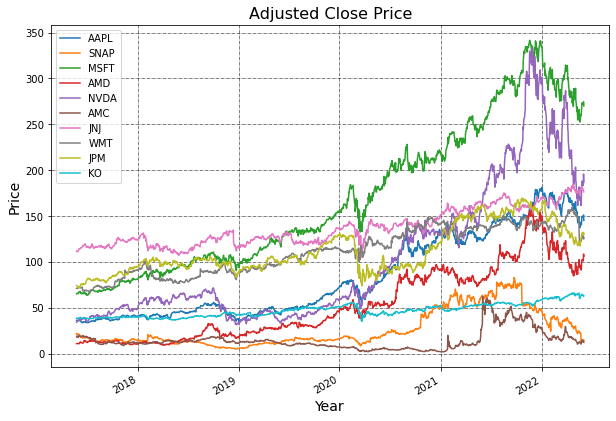

In [77]:
from matplotlib import pyplot as plt

# Plot all the close prices
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [78]:
data.corr()

,AAPL,SNAP,MSFT,AMD,NVDA,AMC,JNJ,WMT,JPM,KO
AAPL,1.000000,0.803427,0.978943,0.974065,0.947940,0.399365,0.944479,0.916779,0.816011,0.847790
SNAP,0.803427,1.000000,0.803733,0.782488,0.768816,0.564278,0.763413,0.750697,0.821741,0.583761
MSFT,0.978943,0.803733,1.000000,0.979307,0.939214,0.442773,0.934645,0.932620,0.846222,0.860671
AMD,0.974065,0.782488,0.979307,1.000000,0.946961,0.401942,0.904257,0.911542,0.805352,0.823253
NVDA,0.947940,0.768816,0.939214,0.946961,1.000000,0.559330,0.874645,0.801970,0.815007,0.770774
AMC,0.399365,0.564278,0.442773,0.401942,0.559330,1.000000,0.414146,0.241992,0.587151,0.336058
JNJ,0.944479,0.763413,0.934645,0.904257,0.874645,0.414146,1.000000,0.885687,0.809653,0.872561
WMT,0.916779,0.750697,0.932620,0.911542,0.801970,0.241992,0.885687,1.000000,0.745999,0.833537
JPM,0.816011,0.821741,0.846222,0.805352,0.815007,0.587151,0.809653,0.745999,1.000000,0.783945
KO,0.847790,0.583761,0.860671,0.823253,0.770774,0.336058,0.872561,0.833537,0.783945,1.000000


In [79]:
split_ratio = 0.2
X = data.values # Convert to NumPy array
split = int(len(X) * (1-split_ratio))
train_set = X[: split]
test_set = X[split:]
print(train_set.shape, test_set.shape)

(1012, 10) (254, 10)


In [80]:
def supvervisedSeries(data, n, h):
  x, y = list (), list ()
  for i in range (len(data)-n-h+1):
    x.append(data[i:(i+n)])
    y.append(data[i+h+n-1])
  return np.array(x), np.array(y)
h = 1
n = 4
trainX, trainY = supvervisedSeries(train_set, n, h)
testX, testY = supvervisedSeries(test_set, n, h)
print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY: ", testY.shape)

trainX:  (1008, 4, 10)
trainY:  (1008, 10)
testX:  (250, 4, 10)
testY:  (250, 10)


In [81]:
testY = np.reshape(testY[:, 0], (testY [:, 0].shape[0], 1))
trainY = np.reshape(trainY[:, 0], (trainY[:, 0].shape[0], 1))
print('trainY: ', trainY.shape)
print('testY:', testY.shape)

trainY:  (1008, 1)
testY: (250, 1)


In [82]:
# Data Scaling
scalers = {}
for i in range (trainX.shape[2]):
  scalers[i] = MinMaxScaler()
  trainX[:, :, i] = scalers[i].fit_transform(trainX[:, :, i])
for i in range(testX.shape[2]):
  testX[:, :, i] = scalers[i].transform(testX[:, :, i])
# The target values are 2D arrays, which is easy to scale
scalerY = MinMaxScaler()
trainY = scalerY.fit_transform(trainY)
testY = scalerY.transform(testY)

In [83]:
# Feed Forward Neural Network
# 100 neurons in each layer
# Flatten input (to support multivariate input)
n_input = trainX.shape[1] * trainX.shape[2]
trainX = trainX.reshape((trainX.shape[0], n_input))
n_input = testX.shape[1] * testX.shape[2]
testX = testX.reshape((testX.shape[0], n_input))
# Create multilayered FFNN model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=trainX.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(trainY.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Fit model
history = model.fit(trainX, trainY, epochs =60, verbose =1)
# Predict the test set
predictions = model.predict(testX)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 24,401
Trainable params: 24,401
Non-trai

In [86]:
# Descale
predictions = scalerY.inverse_transform(predictions)
testY = scalerY.inverse_transform(testY)
# Mean absolute error
mae = mean_absolute_error(testY, predictions)
print("Test MAE: %.6f" % mae)

Test MAE: 344990.510424


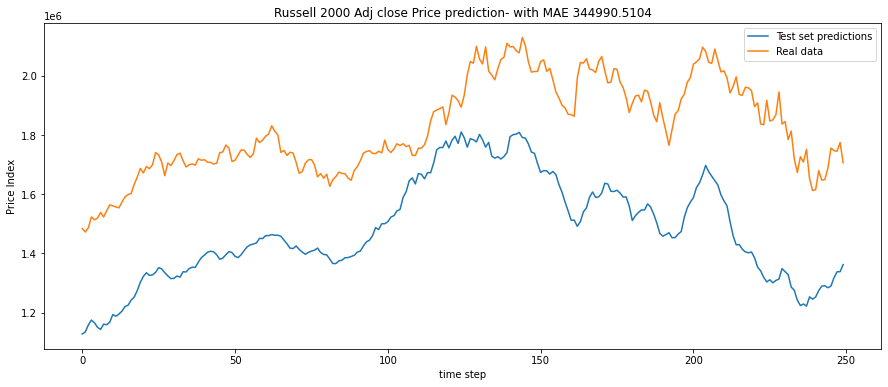

In [87]:
# Plot prediction vs actual values:
plt.figure(figsize=(15,6))
plt.plot(predictions, label="Test set predictions" )
plt.plot(testY, label="Real data")
plt.legend()
plt.ylabel('Price Index')
plt.xlabel('time step' )
plt.title ("Russell 2000 Adj close Price prediction- with MAE {:10.4f}".format(mae))
plt.show()